In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import os

In [2]:
train_dir = r'K:\ORGANISED DATSET\train'
test_dir = r'K:\ORGANISED DATSET\test'

In [3]:
# Use ImageDataGenerator to create train and validation generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1] by dividing by 255
    rotation_range=30,  # Randomly rotate images up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shearing transformation up to 20%
    zoom_range=0.2,  # Randomly zoom in or out by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # Fill any empty pixels after transformations using the nearest pixel value
    validation_split=0.2  # Split the data into training (80%) and validation (20%) sets
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale pixel values for the test data, no augmentation

# Flow from directories for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directory path containing the training images
    target_size=(224, 224),  # Resize all images to 224x224 pixels (required for models like VGG)
    batch_size=32,  # Process images in batches of 32
    class_mode='binary',  # Use binary classification (Benign vs Malignant)
    subset='training'  # Specify this subset as the training data (split defined earlier)
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Same directory as training data
    target_size=(224, 224),  # Resize images to the same size as training images
    batch_size=32,  # Process images in batches of 32
    class_mode='binary',  # Use binary classification for validation data
    subset='validation'  # Specify this subset as the validation data (split defined earlier)
)

# Flow from directory for testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Directory path containing the test images
    target_size=(224, 224),  # Resize all images to 224x224 pixels (same as training)
    batch_size=32,  # Process images in batches of 32
    class_mode='binary',  # Use binary classification for test data
)

Found 5062 images belonging to 2 classes.
Found 1264 images belonging to 2 classes.
Found 1582 images belonging to 2 classes.


In [4]:
from tensorflow.keras.regularizers import l2
# Build the CNN model with L2 Regularization
model = Sequential()  
# Create a Sequential model, which allows stacking layers in a linear fashion.

# Add convolutional layers with L2 regularization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)))  
# Add the first convolutional layer with 32 filters, a kernel size of (3, 3), and 'ReLU' activation.
# 'input_shape' specifies the shape of the input images (224x224 pixels with 3 color channels).
# L2 regularization is applied with a strength of 0.01 to the kernel weights, helping to reduce overfitting.

model.add(MaxPooling2D(pool_size=(2, 2)))  
# Apply max pooling with a pool size of (2, 2) to downsample the spatial dimensions of the feature maps.

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  
# Add the second convolutional layer with 64 filters, a kernel size of (3, 3), and 'ReLU' activation.
# L2 regularization with a strength of 0.01 is applied to the kernel weights.

model.add(MaxPooling2D(pool_size=(2, 2)))  
# Apply max pooling to the feature maps produced by the second convolutional layer.

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  
# Add the third convolutional layer with 128 filters, a kernel size of (3, 3), and 'ReLU' activation.
# L2 regularization with a strength of 0.01 is applied to the kernel weights.

model.add(MaxPooling2D(pool_size=(2, 2)))  
# Apply max pooling to the feature maps produced by the third convolutional layer.

model.add(Flatten())  
# Flatten the 3D output from the last convolutional layer into a 1D array to feed into the fully connected layers.

# Fully connected layers with L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  
# Add a fully connected (dense) layer with 128 units and 'ReLU' activation.
# L2 regularization with a strength of 0.01 is applied to the weights of the dense layer.

model.add(Dropout(0.5))  
# Add a dropout layer with a dropout rate of 0.5 to prevent overfitting by randomly setting half of the input units to 0 during training.

model.add(Dense(1, activation='sigmoid'))  
# Add the output layer with 1 unit for binary classification. It uses the 'sigmoid' activation function to output a probability (between 0 and 1) for the two classes (Benign vs Malignant).

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  
# Compile the model with the Adam optimizer, binary cross-entropy loss function (suitable for binary classification), and accuracy as the evaluation metric.

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  
# Set early stopping to halt training if the validation loss does not improve for 5 consecutive epochs (patience=5).
# The 'restore_best_weights' argument ensures that the model weights are reverted to the best configuration observed during training.

In [5]:
# Train the model
history = model.fit(
    train_generator,  # Training data generator providing batches of images and labels
    epochs=30,
    validation_data=validation_generator,  # Validation data generator for evaluating the model during training
    callbacks=[early_stopping]  # Early stopping callback to stop training if validation loss does not improve
)

Epoch 1/30
159/159 [==============================] - 638s 4s/step - loss: 1.3366 - accuracy: 0.7240 - val_loss: 0.8111 - val_accuracy: 0.7120
Epoch 2/30
159/159 [==============================] - 503s 3s/step - loss: 0.7721 - accuracy: 0.7681 - val_loss: 0.7009 - val_accuracy: 0.6986
Epoch 3/30
159/159 [==============================] - 512s 3s/step - loss: 0.6605 - accuracy: 0.7914 - val_loss: 0.5895 - val_accuracy: 0.8006
Epoch 4/30
159/159 [==============================] - 527s 3s/step - loss: 0.5997 - accuracy: 0.8123 - val_loss: 0.5333 - val_accuracy: 0.8259
Epoch 5/30
159/159 [==============================] - 505s 3s/step - loss: 0.5590 - accuracy: 0.8226 - val_loss: 0.5228 - val_accuracy: 0.8331
Epoch 6/30
159/159 [==============================] - 495s 3s/step - loss: 0.5448 - accuracy: 0.8127 - val_loss: 0.4768 - val_accuracy: 0.8473
Epoch 7/30
159/159 [==============================] - 510s 3s/step - loss: 0.5307 - accuracy: 0.8206 - val_loss: 0.4614 - val_accuracy: 0.8291

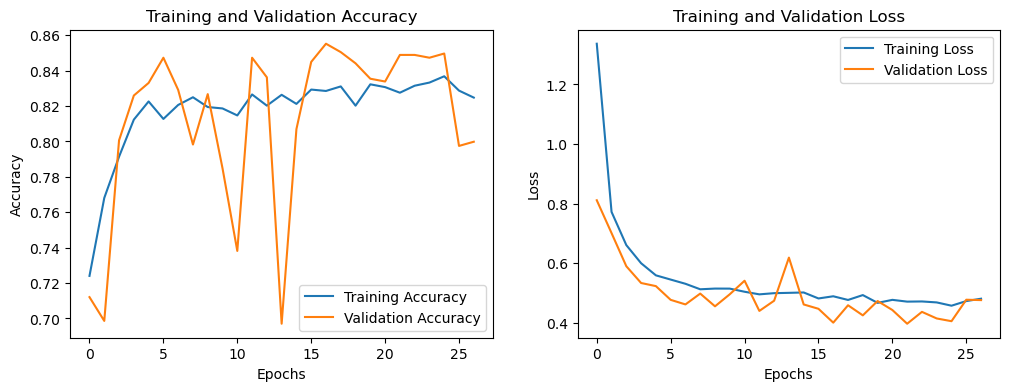

In [6]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))  # Create a figure with a size of 12x4 inches to display the plots

# Accuracy plot
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, selecting the first subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot the validation accuracy over epochs
plt.title('Training and Validation Accuracy')  # Title of the first subplot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish between training and validation accuracy

# Loss plot
plt.subplot(1, 2, 2)  # Create the second subplot in the 1x2 grid for the loss plot
plt.plot(history.history['loss'], label='Training Loss')  # Plot the training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot the validation loss over epochs
plt.title('Training and Validation Loss')  # Title of the second subplot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Add a legend to distinguish between training and validation loss

plt.show()  # Display the plots

In [7]:
# Save the model
model.save(r'C:\Users\K M SASTRY\Desktop\CANCER PREDICTION\cnn_model_full.h5')  
# Save the trained model to a file named 'cnn_model.h5' in HDF5 format.
# This allows you to reload the model later without retraining it.

# Evaluate on test data and print accuracy
test_loss, test_accuracy = model.evaluate(test_generator)  
# Evaluate the model on the test data using the test generator.
# The method returns the loss and accuracy of the model on the test data.

print(f"Test Accuracy: {test_accuracy*100:.2f}%")  
# Print the test accuracy as a percentage, formatted to two decimal places.

C:\Users\K M SASTRY\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 52s 1s/step - loss: 0.4637 - accuracy: 0.8331
Test Accuracy: 83.31%


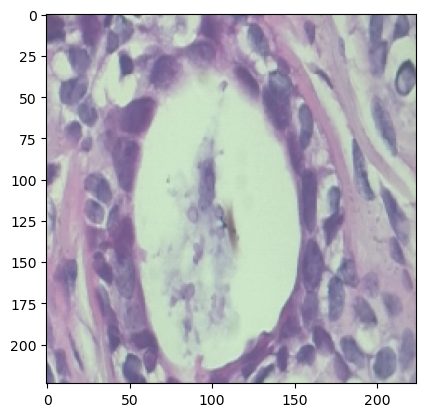

1/1 [==============================] - 1s 1s/step
The model predicts: Benign (94.36%)


In [9]:
# Example of making predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = r'K:\ORGANISED DATSET\test\benign\SOB_B_A-14-22549AB-400-006.png'
# Specify the file path of the image you want to predict. This is a 'benign' image in this case.

# Load the image and resize to 224x224
img = load_img(img_path, target_size=(224, 224))  
# Load the image from the given path and resize it to 224x224 pixels (standard input size for models like VGG)

img_array = img_to_array(img)  # Convert the image to a NumPy array
# Convert the loaded image into a NumPy array to facilitate manipulation and input into the model.

# Normalize the image data
img_array = img_array / 255.0  
# Normalize the pixel values to the range [0, 1] by dividing by 255, which is necessary as the model was trained with this normalization.

# Expand dimensions to create a batch of one (the model expects a batch)
img_array = np.expand_dims(img_array, axis=0)  
# Expand the dimensions of the image array to create a batch of one (because models expect input in batches, even for a single image).

# Display the image
plt.imshow(img)  
# Display the image to visually verify which image is being predicted.


# Add a title to the image plot for clarity.

plt.show()  
# Show the image.

# Make a prediction using the trained model
prediction = model.predict(img_array)  
# Use the trained model to predict the class (Benign or Malignant) of the input image.

# Check the prediction
if prediction[0][0] > 0.5:
    print(f"The model predicts: Malignant ({prediction[0][0]*100:.2f}%)")  
    # If the model's output is greater than 0.5, it predicts "Malignant" with the associated probability.
else:
    print(f"The model predicts: Benign ({(1 - prediction[0][0])*100:.2f}%)")  
    # If the output is less than or equal to 0.5, it predicts "Benign" with the associated probability.

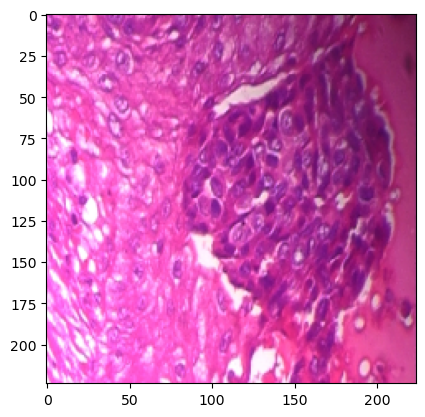

1/1 [==============================] - 0s 40ms/step
The model predicts: Malignant (96.69%)


In [10]:
# Example of making predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = r"K:\ORGANISED DATSET\test\malignant\SOB_M_DC-14-8168-200-005.png"
# Specify the file path of the image you want to predict. This is a 'benign' image in this case.

# Load the image and resize to 224x224
img = load_img(img_path, target_size=(224, 224))  
# Load the image from the given path and resize it to 224x224 pixels (standard input size for models like VGG)

img_array = img_to_array(img)  # Convert the image to a NumPy array
# Convert the loaded image into a NumPy array to facilitate manipulation and input into the model.

# Normalize the image data
img_array = img_array / 255.0  
# Normalize the pixel values to the range [0, 1] by dividing by 255, which is necessary as the model was trained with this normalization.

# Expand dimensions to create a batch of one (the model expects a batch)
img_array = np.expand_dims(img_array, axis=0)  
# Expand the dimensions of the image array to create a batch of one (because models expect input in batches, even for a single image).

# Display the image
plt.imshow(img)  
# Display the image to visually verify which image is being predicted.


# Add a title to the image plot for clarity.

plt.show()  
# Show the image.

# Make a prediction using the trained model
prediction = model.predict(img_array)  
# Use the trained model to predict the class (Benign or Malignant) of the input image.

# Check the prediction
if prediction[0][0] > 0.5:
    print(f"The model predicts: Malignant ({prediction[0][0]*100:.2f}%)")  
    # If the model's output is greater than 0.5, it predicts "Malignant" with the associated probability.
else:
    print(f"The model predicts: Benign ({(1 - prediction[0][0])*100:.2f}%)")  
    # If the output is less than or equal to 0.5, it predicts "Benign" with the associated probability.